# Preliminaries, requirements, imports, ...

In [1]:
import matplotlib.pyplot as plt
import json

from tqdm.auto import tqdm

from video_handler import read_video_as_numpy

from decomposition import *
from rsvd import *
from util import decomposition_results_to_json
from visualization import error_time_analysis


plt.rcParams['figure.figsize'] = [16,6]
plt.rcParams.update({'font.size': 18})

# Reading Video 

In [2]:
n_frames = 60
colorful = True
file_name = "lg_test"
input_folder = "../videos/input"
input_video_path =  input_folder + "/" + file_name + ".mp4"
exp_name = f"{file_name}{n_frames}{'' if colorful else '_gray'}"
fps = 20
format_ = "mp4v"

In [3]:
video_tensor = read_video_as_numpy(input_video_path, n_frames, colorful)

Reading first 60 frames from ../videos/input/lg_test.mp4:   0%|          | 0/60 [00:00<?, ?it/s]

Shape of read tensor = (60, 720, 1280, 3)


# Slicing + RSVD 

In [4]:
results_rsvd = dict()
for compress_ratio in [50, 25, 10, 5, 3]:
    print(f"===== COMPRESSION RATIO = {compress_ratio} =====")
    results_rsvd[compress_ratio] = all_dim_RSVD(exp_name=exp_name+f"_compress_{compress_ratio}",
                                            video_tensor=video_tensor,
                                            desired_compress_ratio=compress_ratio,
                                            format_=format_,
                                            fps=fps,
                                            colorful=colorful,
                                            delete_prev=True,
                                            save=True)
decomposition_results_to_json(exp_name, "RSVD", results_rsvd)

===== COMPRESSION RATIO = 50 =====
Removed previous results from ../videos/output/RSVD/lg_test60_compress_50!!!
RSVD slice by slice along 0-th dimension with rank = 9:


RSVD of each slice:   0%|          | 0/60 [00:00<?, ?it/s]

(Frobenius) || original - reconstructed || / ||original|| =  0.087


Writing (1280, 720)-frames
 into ../videos/output/RSVD/lg_test60_compress_50/RSVD_lg_test60_compress_50_dim_0_…

----------------------------------------------------------------------------------------------------
RSVD slice by slice along 1-th dimension with rank = 1:


RSVD of each slice:   0%|          | 0/720 [00:00<?, ?it/s]

(Frobenius) || original - reconstructed || / ||original|| =  0.009


Writing (1280, 720)-frames
 into ../videos/output/RSVD/lg_test60_compress_50/RSVD_lg_test60_compress_50_dim_1_…

----------------------------------------------------------------------------------------------------
RSVD slice by slice along 2-th dimension with rank = 1:


RSVD of each slice:   0%|          | 0/1280 [00:00<?, ?it/s]

(Frobenius) || original - reconstructed || / ||original|| =  0.010


Writing (1280, 720)-frames
 into ../videos/output/RSVD/lg_test60_compress_50/RSVD_lg_test60_compress_50_dim_2_…

----------------------------------------------------------------------------------------------------
===== COMPRESSION RATIO = 25 =====
Removed previous results from ../videos/output/RSVD/lg_test60_compress_25!!!
RSVD slice by slice along 0-th dimension with rank = 18:


RSVD of each slice:   0%|          | 0/60 [00:00<?, ?it/s]

(Frobenius) || original - reconstructed || / ||original|| =  0.049


Writing (1280, 720)-frames
 into ../videos/output/RSVD/lg_test60_compress_25/RSVD_lg_test60_compress_25_dim_0_…

----------------------------------------------------------------------------------------------------
RSVD slice by slice along 1-th dimension with rank = 2:


RSVD of each slice:   0%|          | 0/720 [00:00<?, ?it/s]

(Frobenius) || original - reconstructed || / ||original|| =  0.007


Writing (1280, 720)-frames
 into ../videos/output/RSVD/lg_test60_compress_25/RSVD_lg_test60_compress_25_dim_1_…

----------------------------------------------------------------------------------------------------
RSVD slice by slice along 2-th dimension with rank = 2:


RSVD of each slice:   0%|          | 0/1280 [00:00<?, ?it/s]

(Frobenius) || original - reconstructed || / ||original|| =  0.007


Writing (1280, 720)-frames
 into ../videos/output/RSVD/lg_test60_compress_25/RSVD_lg_test60_compress_25_dim_2_…

----------------------------------------------------------------------------------------------------
===== COMPRESSION RATIO = 10 =====
Removed previous results from ../videos/output/RSVD/lg_test60_compress_10!!!
RSVD slice by slice along 0-th dimension with rank = 46:


RSVD of each slice:   0%|          | 0/60 [00:00<?, ?it/s]

(Frobenius) || original - reconstructed || / ||original|| =  0.019


Writing (1280, 720)-frames
 into ../videos/output/RSVD/lg_test60_compress_10/RSVD_lg_test60_compress_10_dim_0_…

----------------------------------------------------------------------------------------------------
RSVD slice by slice along 1-th dimension with rank = 5:


RSVD of each slice:   0%|          | 0/720 [00:00<?, ?it/s]

(Frobenius) || original - reconstructed || / ||original|| =  0.004


Writing (1280, 720)-frames
 into ../videos/output/RSVD/lg_test60_compress_10/RSVD_lg_test60_compress_10_dim_1_…

----------------------------------------------------------------------------------------------------
RSVD slice by slice along 2-th dimension with rank = 5:


RSVD of each slice:   0%|          | 0/1280 [00:00<?, ?it/s]

(Frobenius) || original - reconstructed || / ||original|| =  0.004


Writing (1280, 720)-frames
 into ../videos/output/RSVD/lg_test60_compress_10/RSVD_lg_test60_compress_10_dim_2_…

----------------------------------------------------------------------------------------------------
===== COMPRESSION RATIO = 5 =====
Removed previous results from ../videos/output/RSVD/lg_test60_compress_5!!!
RSVD slice by slice along 0-th dimension with rank = 92:


RSVD of each slice:   0%|          | 0/60 [00:00<?, ?it/s]

(Frobenius) || original - reconstructed || / ||original|| =  0.009


Writing (1280, 720)-frames
 into ../videos/output/RSVD/lg_test60_compress_5/RSVD_lg_test60_compress_5_dim_0_ra…

----------------------------------------------------------------------------------------------------
RSVD slice by slice along 1-th dimension with rank = 11:


RSVD of each slice:   0%|          | 0/720 [00:00<?, ?it/s]

(Frobenius) || original - reconstructed || / ||original|| =  0.002


Writing (1280, 720)-frames
 into ../videos/output/RSVD/lg_test60_compress_5/RSVD_lg_test60_compress_5_dim_1_ra…

----------------------------------------------------------------------------------------------------
RSVD slice by slice along 2-th dimension with rank = 11:


RSVD of each slice:   0%|          | 0/1280 [00:00<?, ?it/s]

(Frobenius) || original - reconstructed || / ||original|| =  0.002


Writing (1280, 720)-frames
 into ../videos/output/RSVD/lg_test60_compress_5/RSVD_lg_test60_compress_5_dim_2_ra…

----------------------------------------------------------------------------------------------------
===== COMPRESSION RATIO = 3 =====
Removed previous results from ../videos/output/RSVD/lg_test60_compress_3!!!
RSVD slice by slice along 0-th dimension with rank = 153:


RSVD of each slice:   0%|          | 0/60 [00:00<?, ?it/s]

(Frobenius) || original - reconstructed || / ||original|| =  0.005


Writing (1280, 720)-frames
 into ../videos/output/RSVD/lg_test60_compress_3/RSVD_lg_test60_compress_3_dim_0_ra…

----------------------------------------------------------------------------------------------------
RSVD slice by slice along 1-th dimension with rank = 19:


RSVD of each slice:   0%|          | 0/720 [00:00<?, ?it/s]

(Frobenius) || original - reconstructed || / ||original|| =  0.001


Writing (1280, 720)-frames
 into ../videos/output/RSVD/lg_test60_compress_3/RSVD_lg_test60_compress_3_dim_1_ra…

----------------------------------------------------------------------------------------------------
RSVD slice by slice along 2-th dimension with rank = 18:


RSVD of each slice:   0%|          | 0/1280 [00:00<?, ?it/s]

(Frobenius) || original - reconstructed || / ||original|| =  0.001


Writing (1280, 720)-frames
 into ../videos/output/RSVD/lg_test60_compress_3/RSVD_lg_test60_compress_3_dim_2_ra…

----------------------------------------------------------------------------------------------------
Saved to ../jsons/RSVD_lg_test60.json


# Tensor methods

## Tensorly Tucker

In [5]:
results_tucker = dict()
for compress_ratio in [50_000, 25_000, 10_000, 5_000, 2_500, 1_000, 500, 250, 100, 50, 25, 10, 5, 3]:
    print(f"===== COMPRESSION RATIO = {compress_ratio} =====")
    results_tucker[compress_ratio] = decomposition(exp_name+f"_compress_{compress_ratio}", video_tensor,
                                                        "Tucker", {"tol": 1e-6, "n_iter_max": 100},
                                                        desired_compress_ratio=compress_ratio,
                                                        format_=format_,
                                                        fps=fps,
                                                        colorful=colorful,
                                                        delete_prev=True)
decomposition_results_to_json(exp_name, "Tucker", results_tucker)

===== COMPRESSION RATIO = 50000 =====
Removed previous results from ../videos/output/Tucker/lg_test60_compress_50000!!!
Suggested ranks for desired compression ratio 50000 is [1, 1, 1, 2], exact comression ratio is  80216.634
Tucker took  1.65 seconds.
Converged in 4 iterations with relative error of  0.357


Writing (1280, 720)-frames
 into ../videos/output/Tucker/lg_test60_compress_50000/Tucker_lg_test60_compress_50…

Total:  3.63 seconds.
===== COMPRESSION RATIO = 25000 =====
Removed previous results from ../videos/output/Tucker/lg_test60_compress_25000!!!
Suggested ranks for desired compression ratio 25000 is [2, 3, 3, 3], exact comression ratio is  26829.694
Tucker took  2.88 seconds.
Converged in 6 iterations with relative error of  0.197


Writing (1280, 720)-frames
 into ../videos/output/Tucker/lg_test60_compress_25000/Tucker_lg_test60_compress_25…

Total:  5.25 seconds.
===== COMPRESSION RATIO = 10000 =====
Removed previous results from ../videos/output/Tucker/lg_test60_compress_10000!!!
Suggested ranks for desired compression ratio 10000 is [2, 8, 8, 3], exact comression ratio is  10045.903
Tucker took  5.17 seconds.
Converged in 11 iterations with relative error of  0.102


Writing (1280, 720)-frames
 into ../videos/output/Tucker/lg_test60_compress_10000/Tucker_lg_test60_compress_10…

Total:  7.55 seconds.
===== COMPRESSION RATIO = 5000 =====
Removed previous results from ../videos/output/Tucker/lg_test60_compress_5000!!!
Suggested ranks for desired compression ratio 5000 is [3, 15, 15, 3], exact comression ratio is  5149.562
Tucker took  3.84 seconds.
Converged in 7 iterations with relative error of  0.057


Writing (1280, 720)-frames
 into ../videos/output/Tucker/lg_test60_compress_5000/Tucker_lg_test60_compress_500…

Total:  6.27 seconds.
===== COMPRESSION RATIO = 2500 =====
Removed previous results from ../videos/output/Tucker/lg_test60_compress_2500!!!
Suggested ranks for desired compression ratio 2500 is [4, 28, 28, 3], exact comression ratio is  2526.585
Tucker took  4.58 seconds.
Converged in 6 iterations with relative error of  0.032


Writing (1280, 720)-frames
 into ../videos/output/Tucker/lg_test60_compress_2500/Tucker_lg_test60_compress_250…

Total:  7.02 seconds.
===== COMPRESSION RATIO = 1000 =====
Removed previous results from ../videos/output/Tucker/lg_test60_compress_1000!!!
Suggested ranks for desired compression ratio 1000 is [6, 55, 55, 3], exact comression ratio is  1006.486
Tucker took  10.80 seconds.
Converged in 7 iterations with relative error of  0.017


Writing (1280, 720)-frames
 into ../videos/output/Tucker/lg_test60_compress_1000/Tucker_lg_test60_compress_100…

Total:  13.22 seconds.
===== COMPRESSION RATIO = 500 =====
Removed previous results from ../videos/output/Tucker/lg_test60_compress_500!!!
Suggested ranks for desired compression ratio 500 is [7, 86, 87, 3], exact comression ratio is  501.428
Tucker took  12.05 seconds.
Converged in 5 iterations with relative error of  0.011


Writing (1280, 720)-frames
 into ../videos/output/Tucker/lg_test60_compress_500/Tucker_lg_test60_compress_500_…

Total:  14.67 seconds.
===== COMPRESSION RATIO = 250 =====
Removed previous results from ../videos/output/Tucker/lg_test60_compress_250!!!
Suggested ranks for desired compression ratio 250 is [9, 114, 133, 3], exact comression ratio is  250.494
Tucker took  17.39 seconds.
Converged in 4 iterations with relative error of  0.008


Writing (1280, 720)-frames
 into ../videos/output/Tucker/lg_test60_compress_250/Tucker_lg_test60_compress_250_…

Total:  20.30 seconds.
===== COMPRESSION RATIO = 100 =====
Removed previous results from ../videos/output/Tucker/lg_test60_compress_100!!!
Suggested ranks for desired compression ratio 100 is [12, 155, 225, 3], exact comression ratio is  100.184
Tucker took  30.34 seconds.
Converged in 4 iterations with relative error of  0.006


Writing (1280, 720)-frames
 into ../videos/output/Tucker/lg_test60_compress_100/Tucker_lg_test60_compress_100_…

Total:  33.41 seconds.
===== COMPRESSION RATIO = 50 =====
Removed previous results from ../videos/output/Tucker/lg_test60_compress_50!!!
Suggested ranks for desired compression ratio 50 is [16, 195, 298, 3], exact comression ratio is  50.086
Tucker took  49.19 seconds.
Converged in 4 iterations with relative error of  0.005


Writing (1280, 720)-frames
 into ../videos/output/Tucker/lg_test60_compress_50/Tucker_lg_test60_compress_50_ra…

Total:  52.23 seconds.
===== COMPRESSION RATIO = 25 =====
Removed previous results from ../videos/output/Tucker/lg_test60_compress_25!!!
Suggested ranks for desired compression ratio 25 is [20, 246, 402, 3], exact comression ratio is  25.034
Tucker took  69.41 seconds.
Converged in 4 iterations with relative error of  0.004


Writing (1280, 720)-frames
 into ../videos/output/Tucker/lg_test60_compress_25/Tucker_lg_test60_compress_25_ra…

Total:  72.80 seconds.
===== COMPRESSION RATIO = 10 =====
Removed previous results from ../videos/output/Tucker/lg_test60_compress_10!!!
Suggested ranks for desired compression ratio 10 is [27, 334, 576, 3], exact comression ratio is  10.016
Tucker took  89.19 seconds.
Converged in 3 iterations with relative error of  0.002


Writing (1280, 720)-frames
 into ../videos/output/Tucker/lg_test60_compress_10/Tucker_lg_test60_compress_10_ra…

Total:  93.55 seconds.
===== COMPRESSION RATIO = 5 =====
Removed previous results from ../videos/output/Tucker/lg_test60_compress_5!!!
Suggested ranks for desired compression ratio 5 is [35, 421, 722, 3], exact comression ratio is  5.005
Tucker took  136.59 seconds.
Converged in 3 iterations with relative error of  0.002


Writing (1280, 720)-frames
 into ../videos/output/Tucker/lg_test60_compress_5/Tucker_lg_test60_compress_5_rank…

Total:  140.48 seconds.
===== COMPRESSION RATIO = 3 =====
Removed previous results from ../videos/output/Tucker/lg_test60_compress_3!!!
Suggested ranks for desired compression ratio 3 is [41, 499, 876, 3], exact comression ratio is  3.003
Tucker took  187.34 seconds.
Converged in 3 iterations with relative error of  0.001


Writing (1280, 720)-frames
 into ../videos/output/Tucker/lg_test60_compress_3/Tucker_lg_test60_compress_3_rank…

Total:  191.38 seconds.
Saved to ../jsons/Tucker_lg_test60.json


## Tensorly CP

In [6]:
results_cp = dict()
for compress_ratio in [50_000, 25_000, 10_000, 5_000, 2_500, 1_000]:
    print(f"===== COMPRESSION RATIO = {compress_ratio} =====")
    results_cp[compress_ratio] = decomposition(exp_name+f"_compress_{compress_ratio}", video_tensor,
                                                        "CP", {"tol": 1e-6, "n_iter_max": 100, "n_samples": 5_000},
                                                        desired_compress_ratio=compress_ratio,
                                                        format_=format_,
                                                        fps=fps,
                                                        colorful=colorful,
                                                        delete_prev=True)
decomposition_results_to_json(exp_name, "CP", results_cp)

===== COMPRESSION RATIO = 50000 =====
Removed previous results from ../videos/output/CP/lg_test60_compress_50000!!!
Suggested rank for desired compression ratio 50000 is 1, exact comression ratio is  80411.052
CP took  28.91 seconds.
Converged in 35 iterations with relative error of  0.357


Writing (1280, 720)-frames
 into ../videos/output/CP/lg_test60_compress_50000/CP_lg_test60_compress_50000_rank…

Total:  29.98 seconds.
===== COMPRESSION RATIO = 25000 =====
Removed previous results from ../videos/output/CP/lg_test60_compress_25000!!!
Suggested rank for desired compression ratio 25000 is 3, exact comression ratio is  26803.684
CP took  83.43 seconds.
Converged in 100 iterations with relative error of  0.198


Writing (1280, 720)-frames
 into ../videos/output/CP/lg_test60_compress_25000/CP_lg_test60_compress_25000_rank…

Total:  84.53 seconds.
===== COMPRESSION RATIO = 10000 =====
Removed previous results from ../videos/output/CP/lg_test60_compress_10000!!!
Suggested rank for desired compression ratio 10000 is 8, exact comression ratio is  10051.381
CP took  96.85 seconds.
Converged in 100 iterations with relative error of  0.108


Writing (1280, 720)-frames
 into ../videos/output/CP/lg_test60_compress_10000/CP_lg_test60_compress_10000_rank…

Total:  98.09 seconds.
===== COMPRESSION RATIO = 5000 =====
Removed previous results from ../videos/output/CP/lg_test60_compress_5000!!!
Suggested rank for desired compression ratio 5000 is 16, exact comression ratio is  5025.691
CP took  115.27 seconds.
Converged in 100 iterations with relative error of  0.062


Writing (1280, 720)-frames
 into ../videos/output/CP/lg_test60_compress_5000/CP_lg_test60_compress_5000_ranks_…

Total:  116.71 seconds.
===== COMPRESSION RATIO = 2500 =====
Removed previous results from ../videos/output/CP/lg_test60_compress_2500!!!
Suggested rank for desired compression ratio 2500 is 32, exact comression ratio is  2512.845
CP took  150.56 seconds.
Converged in 100 iterations with relative error of  0.036


Writing (1280, 720)-frames
 into ../videos/output/CP/lg_test60_compress_2500/CP_lg_test60_compress_2500_ranks_…

Total:  152.51 seconds.
===== COMPRESSION RATIO = 1000 =====
Removed previous results from ../videos/output/CP/lg_test60_compress_1000!!!
Suggested rank for desired compression ratio 1000 is 80, exact comression ratio is  1005.138
CP took  256.85 seconds.
Converged in 100 iterations with relative error of  0.020


Writing (1280, 720)-frames
 into ../videos/output/CP/lg_test60_compress_1000/CP_lg_test60_compress_1000_ranks_…

Total:  259.56 seconds.
Saved to ../jsons/CP_lg_test60.json


## Tensorly Non-Negative Tucker

In [7]:
"""
if (video_tensor >= 0).all():
    results_non_neg_tucker = dict()
    for compress_ratio in [1000, 500, 250, 100]:
        print(f"===== COMPRESSION RATIO = {compress_ratio} =====")
        results_non_neg_tucker[compress_ratio] = decomposition_tucker(exp_name+f"_compress_{compress_ratio}", video_tensor,
                                                            "NonNegTucker", {"tol": 1e-6, "n_iter_max": 100},
                                                            desired_compress_ratio=compress_ratio,
                                                            format_=format_,
                                                            fps=fps,
                                                            colorful=colorful,
                                                            delete_prev=True)
"""

'\nif (video_tensor >= 0).all():\n    results_non_neg_tucker = dict()\n    for compress_ratio in [1000, 500, 250, 100]:\n        print(f"===== COMPRESSION RATIO = {compress_ratio} =====")\n        results_non_neg_tucker[compress_ratio] = decomposition_tucker(exp_name+f"_compress_{compress_ratio}", video_tensor,\n                                                            "NonNegTucker", {"tol": 1e-6, "n_iter_max": 100},\n                                                            desired_compress_ratio=compress_ratio,\n                                                            format_=format_,\n                                                            fps=fps,\n                                                            colorful=colorful,\n                                                            delete_prev=True)\n'

## Pyttb Tucker ALS

In [8]:
"""
results_tucker_ALS = dict()
for compress_ratio in [2, 3, 5, 10, 25, 50]:
    print(f"===== COMPRESSION RATIO = {compress_ratio} =====")
    results_tucker_ALS[compress_ratio] = decomposition_tucker(exp_name+f"_compress_{compress_ratio}", video_tensor, "TuckerALS", {"tol": 1e-3},
                                                desired_compress_ratio=compress_ratio,
                                                format_=format_,
                                                fps=fps,
                                                colorful=colorful,
                                                delete_prev=True)

decomposition_results_to_json(exp_name, "TuckerALS", results_tucker_ALS)
"""

'\nresults_tucker_ALS = dict()\nfor compress_ratio in [2, 3, 5, 10, 25, 50]:\n    print(f"===== COMPRESSION RATIO = {compress_ratio} =====")\n    results_tucker_ALS[compress_ratio] = decomposition_tucker(exp_name+f"_compress_{compress_ratio}", video_tensor, "TuckerALS", {"tol": 1e-3},\n                                                desired_compress_ratio=compress_ratio,\n                                                format_=format_,\n                                                fps=fps,\n                                                colorful=colorful,\n                                                delete_prev=True)\n\ndecomposition_results_to_json(exp_name, "TuckerALS", results_tucker_ALS)\n'

## Pyttb HOSVD

In [9]:
results_hosvd = dict()
for compress_ratio in [50_000, 25_000, 10_000, 5_000, 2_500, 1_000, 500, 250, 100, 50, 25, 10, 5, 3]:
    print(f"===== COMPRESSION RATIO = {compress_ratio} =====")
    results_hosvd[compress_ratio] = decomposition(exp_name+f"_compress_{compress_ratio}", video_tensor, "HOSVD", {"tol": 1e-6},
                                                desired_compress_ratio=compress_ratio,
                                                format_=format_,
                                                fps=fps,
                                                colorful=colorful,
                                                delete_prev=True)
    
decomposition_results_to_json(exp_name, "HOSVD", results_hosvd)

===== COMPRESSION RATIO = 50000 =====
Removed previous results from ../videos/output/HOSVD/lg_test60_compress_50000!!!
Suggested ranks for desired compression ratio 50000 is [1, 1, 1, 2], exact comression ratio is  80216.634
HOSVD took  41.35 seconds.
Converged in 1 iterations with relative error of  0.288


Writing (1280, 720)-frames
 into ../videos/output/HOSVD/lg_test60_compress_50000/HOSVD_lg_test60_compress_5000…

Total:  50.92 seconds.
===== COMPRESSION RATIO = 25000 =====
Removed previous results from ../videos/output/HOSVD/lg_test60_compress_25000!!!
Suggested ranks for desired compression ratio 25000 is [2, 3, 3, 3], exact comression ratio is  26829.694
HOSVD took  41.40 seconds.
Converged in 1 iterations with relative error of  0.166


Writing (1280, 720)-frames
 into ../videos/output/HOSVD/lg_test60_compress_25000/HOSVD_lg_test60_compress_2500…

Total:  50.83 seconds.
===== COMPRESSION RATIO = 10000 =====
Removed previous results from ../videos/output/HOSVD/lg_test60_compress_10000!!!
Suggested ranks for desired compression ratio 10000 is [2, 8, 8, 3], exact comression ratio is  10045.903
HOSVD took  40.94 seconds.
Converged in 1 iterations with relative error of  0.094


Writing (1280, 720)-frames
 into ../videos/output/HOSVD/lg_test60_compress_10000/HOSVD_lg_test60_compress_1000…

Total:  50.28 seconds.
===== COMPRESSION RATIO = 5000 =====
Removed previous results from ../videos/output/HOSVD/lg_test60_compress_5000!!!
Suggested ranks for desired compression ratio 5000 is [3, 15, 15, 3], exact comression ratio is  5149.562
HOSVD took  41.06 seconds.
Converged in 1 iterations with relative error of  0.054


Writing (1280, 720)-frames
 into ../videos/output/HOSVD/lg_test60_compress_5000/HOSVD_lg_test60_compress_5000_…

Total:  50.65 seconds.
===== COMPRESSION RATIO = 2500 =====
Removed previous results from ../videos/output/HOSVD/lg_test60_compress_2500!!!
Suggested ranks for desired compression ratio 2500 is [4, 28, 28, 3], exact comression ratio is  2526.585
HOSVD took  41.49 seconds.
Converged in 1 iterations with relative error of  0.031


Writing (1280, 720)-frames
 into ../videos/output/HOSVD/lg_test60_compress_2500/HOSVD_lg_test60_compress_2500_…

Total:  51.18 seconds.
===== COMPRESSION RATIO = 1000 =====
Removed previous results from ../videos/output/HOSVD/lg_test60_compress_1000!!!
Suggested ranks for desired compression ratio 1000 is [6, 55, 55, 3], exact comression ratio is  1006.486
HOSVD took  42.00 seconds.
Converged in 1 iterations with relative error of  0.017


Writing (1280, 720)-frames
 into ../videos/output/HOSVD/lg_test60_compress_1000/HOSVD_lg_test60_compress_1000_…

Total:  51.56 seconds.
===== COMPRESSION RATIO = 500 =====
Removed previous results from ../videos/output/HOSVD/lg_test60_compress_500!!!
Suggested ranks for desired compression ratio 500 is [7, 86, 87, 3], exact comression ratio is  501.428
HOSVD took  43.08 seconds.
Converged in 1 iterations with relative error of  0.011


Writing (1280, 720)-frames
 into ../videos/output/HOSVD/lg_test60_compress_500/HOSVD_lg_test60_compress_500_ra…

Total:  52.56 seconds.
===== COMPRESSION RATIO = 250 =====
Removed previous results from ../videos/output/HOSVD/lg_test60_compress_250!!!
Suggested ranks for desired compression ratio 250 is [9, 114, 133, 3], exact comression ratio is  250.494
HOSVD took  43.10 seconds.
Converged in 1 iterations with relative error of  0.008


Writing (1280, 720)-frames
 into ../videos/output/HOSVD/lg_test60_compress_250/HOSVD_lg_test60_compress_250_ra…

Total:  53.26 seconds.
===== COMPRESSION RATIO = 100 =====
Removed previous results from ../videos/output/HOSVD/lg_test60_compress_100!!!
Suggested ranks for desired compression ratio 100 is [12, 155, 225, 3], exact comression ratio is  100.184
HOSVD took  43.80 seconds.
Converged in 1 iterations with relative error of  0.006


Writing (1280, 720)-frames
 into ../videos/output/HOSVD/lg_test60_compress_100/HOSVD_lg_test60_compress_100_ra…

Total:  54.24 seconds.
===== COMPRESSION RATIO = 50 =====
Removed previous results from ../videos/output/HOSVD/lg_test60_compress_50!!!
Suggested ranks for desired compression ratio 50 is [16, 195, 298, 3], exact comression ratio is  50.086
HOSVD took  45.56 seconds.
Converged in 1 iterations with relative error of  0.005


Writing (1280, 720)-frames
 into ../videos/output/HOSVD/lg_test60_compress_50/HOSVD_lg_test60_compress_50_rank…

Total:  56.90 seconds.
===== COMPRESSION RATIO = 25 =====
Removed previous results from ../videos/output/HOSVD/lg_test60_compress_25!!!
Suggested ranks for desired compression ratio 25 is [20, 246, 402, 3], exact comression ratio is  25.034
HOSVD took  47.92 seconds.
Converged in 1 iterations with relative error of  0.004


Writing (1280, 720)-frames
 into ../videos/output/HOSVD/lg_test60_compress_25/HOSVD_lg_test60_compress_25_rank…

Total:  60.13 seconds.
===== COMPRESSION RATIO = 10 =====
Removed previous results from ../videos/output/HOSVD/lg_test60_compress_10!!!
Suggested ranks for desired compression ratio 10 is [27, 334, 576, 3], exact comression ratio is  10.016
HOSVD took  51.23 seconds.
Converged in 1 iterations with relative error of  0.002


Writing (1280, 720)-frames
 into ../videos/output/HOSVD/lg_test60_compress_10/HOSVD_lg_test60_compress_10_rank…

Total:  64.74 seconds.
===== COMPRESSION RATIO = 5 =====
Removed previous results from ../videos/output/HOSVD/lg_test60_compress_5!!!
Suggested ranks for desired compression ratio 5 is [35, 421, 722, 3], exact comression ratio is  5.005
HOSVD took  56.67 seconds.
Converged in 1 iterations with relative error of  0.002


Writing (1280, 720)-frames
 into ../videos/output/HOSVD/lg_test60_compress_5/HOSVD_lg_test60_compress_5_ranks_…

Total:  71.36 seconds.
===== COMPRESSION RATIO = 3 =====
Removed previous results from ../videos/output/HOSVD/lg_test60_compress_3!!!
Suggested ranks for desired compression ratio 3 is [41, 499, 876, 3], exact comression ratio is  3.003
HOSVD took  62.31 seconds.
Converged in 1 iterations with relative error of  0.001


Writing (1280, 720)-frames
 into ../videos/output/HOSVD/lg_test60_compress_3/HOSVD_lg_test60_compress_3_ranks_…

Total:  78.35 seconds.
Saved to ../jsons/HOSVD_lg_test60.json


# Time and Error Analysis

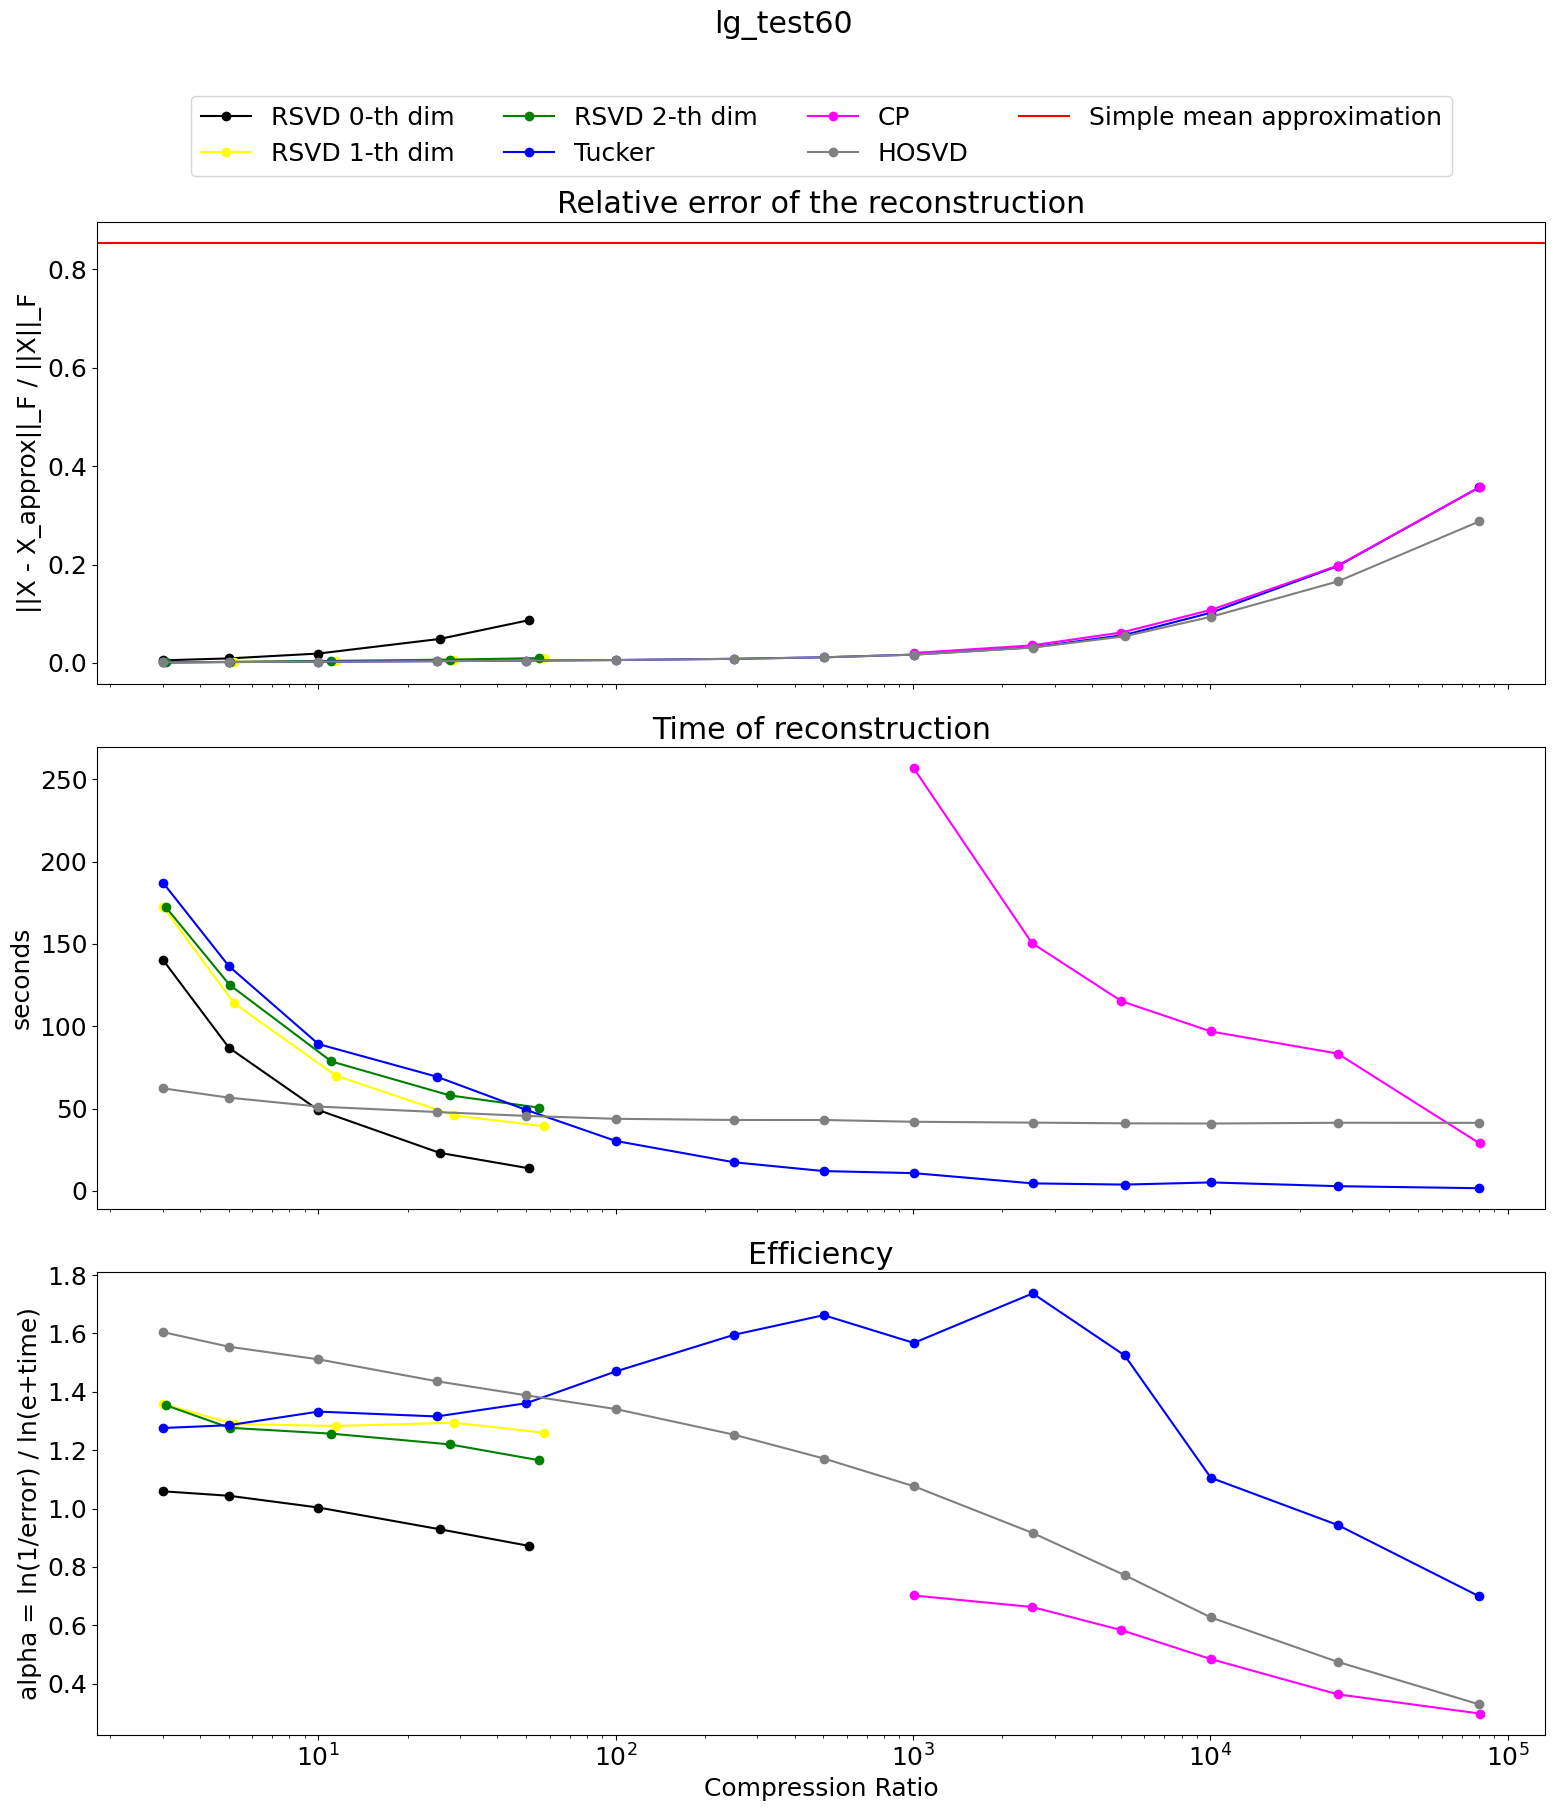

In [11]:
all_results = dict()

for method in ['RSVD', 'Tucker', 'CP', 'HOSVD']:
    with open(f"../jsons/{method}_{exp_name}.json", "r") as openfile:
        all_results[method] = json.load(openfile)
        
error_time_analysis(exp_name, video_tensor, all_results)